# ASSUMPTION

- **Assumption of Stability:** It is assumed that no significant unforeseen events occurred between 2015 and 2017 that would substantially affect the data under analysis.


- **Relevance of Current Information:** The data remains current and relevant for efficient analysis and strategic planning regarding hotel operations.


- **Absence of Unexpected Drawbacks:** There are no unanticipated negative consequences anticipated from implementing recommended strategies for the hotel.


- **Non-Utilization of Proposed Solutions:** The hotel is not currently employing any of the suggested solutions to address booking cancellations.


- **Primary Impact of Cancellations on Revenue:** The most significant factor influencing potential revenue loss is attributed to cancellations of bookings.


- **Impact of Cancellations on Room Utilization:** Cancellations result in rooms remaining vacant for the duration of the originally booked stay.


- **Timeliness of Reservation and Cancellation:** Clients typically make hotel reservations and cancellations within the same calendar year.


# Research Questions

- What are the key variables influencing the cancellation of hotel reservations?

- How can the process of handling hotel reservation cancellations be optimized?

- In what ways can hotels be supported in making informed decisions regarding pricing and promotions?


# Hypothesis

- Higher prices are associated with an increase in reservation cancellations.
- Increased waiting list duration correlates with higher cancellation rates among customers.
- A significant proportion of clients prefer making their reservations through offline travel agents.




# IMPORTING LIBRARIES



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')




# DISPLAYING WITHOUT TRUNCATION

In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# LOADING DATASET

In [5]:
df = pd.read_csv(r'/Users/distinctiveepiphany/Downloads/Employee+Sample+Data/SAMPLE DATA SETS/hotel_bookings 2.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


# EDA & CLEANING

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [8]:
df.shape

(119390, 32)

In [9]:
df.size

3820480

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'],format = '%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [16]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [19]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


## let's check for the unique values of each object type columns

In [23]:
for col in df.describe(include = 'object').columns: 
    print('\033[1m' + col + '\033[0m')# to bold the columns
    print(df[col].unique())
    print('--'*57)

hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT

## value_counts()

In [24]:
for col in df.describe(include = 'object').columns: 
    print('\033[1m' + col + '\033[0m')# to bold the columns
    print(df[col].value_counts())
    print('--'*57)

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
------------------------------------------------------------------------------------------------------------------
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
------------------------------------------------------------------------------------------------------------------
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
------------------------------------------------------------------------------------------------------------------
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
SMR        1
LCA        1
MRT        1
DMA        1
AIA        1
Name: country, Le

## missing values

In [25]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## removing columns

In [26]:
## dropping agent and company for the not null value counts - too high and we dont need these columns either
df.drop(['company','agent'],axis = 1, inplace = True)

## dropping rows

In [27]:
df.dropna(axis = 0, inplace = True)

In [28]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [29]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


## check for adr - max : 5400 not possible => ouytlier. let's remove

In [65]:
sd = df['adr'].std()
sd

50.485862081672586

In [66]:
# lower_threshold 

l_t = df['adr'].mean() - 3*sd
u_t = df['adr'].mean() + 3*sd

In [68]:
df_f = df.query('(adr > @l_t) & (adr < @u_t)')
df_f.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [69]:
df.shape[0] - df_f.shape[0]

1136

In [70]:
df_f.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,117762.000000,117762.000000,117762.000000,117762.000000,117762.000000,117762.000000,117762.000000,117762.000000,117762.000000,117762.000000,117762.000000,117762.000000,117762.000000,117762.000000,117762.000000,117762.000000,117762.000000,117762.000000
mean,0.371342,104.648919,2016.153233,27.126102,15.789635,0.926623,2.497070,1.854894,0.095447,0.007787,0.032141,0.087966,0.132674,0.219315,2.350750,100.182237,0.060682,0.568613
std,0.483166,107.140787,0.707379,13.631623,8.781307,0.996146,1.899978,0.578179,0.380140,0.096642,0.176375,0.849887,1.491578,0.649809,17.707355,44.665305,0.241962,0.789793
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.032500,0.000000,0.000000
50%,0.000000,70.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,253.330000,8.000000,5.000000


- now it is in ranges

# ANALYSIS and Visualisation

- since I have assumed outliers to be null
- will go with the unfiltered dataset

In [71]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


### we are concerened with cancellations



In [73]:
df['is_canceled'].value_counts()

0    74745
1    44153
Name: is_canceled, dtype: int64

In [75]:
df['is_canceled'].value_counts(normalize = True)*100

0    62.864808
1    37.135192
Name: is_canceled, dtype: float64

- thus, 37.13 % is the current Cancellation rate

In [77]:
cancellation_df = pd.DataFrame(df['is_canceled'].value_counts(normalize = True)*100).reset_index()

cancellation_df


,index,is_canceled
0,0,62.864808
1,1,37.135192


## plotting

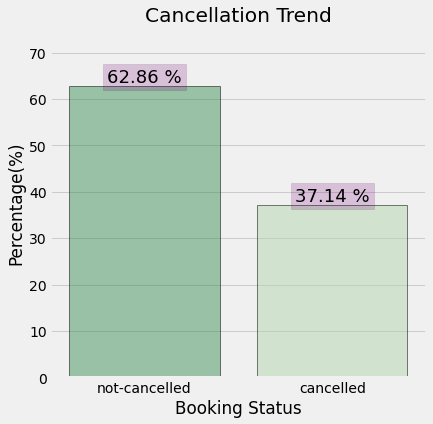

In [438]:
plt.figure(figsize = (6,6))

ax = sns.barplot(x = 'index', y = 'is_canceled', data = cancellation_df , palette = 'Greens_r', alpha = 0.5,
                linewidth = 1, edgecolor = 'black')

y_max  = cancellation_df['is_canceled'].max()
ax.set_ylim(0, y_max * 1.2)

ax.set_xticklabels(['not-cancelled', 'cancelled'])

for container in (ax.containers):
    for bar in (container):
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2,h, f'{str(round(h,2))} %', fontsize = 18, color = 'black',
               ha = 'center', va = 'bottom', bbox = {'facecolor': 'purple', 'edgecolor':'black','alpha' : 0.2})

plt.title('Cancellation Trend')
plt.ylabel('Percentage(%)')
plt.xlabel('Booking Status')
plt.show()

## counting the no of cancellation and non_cancellation of different hotels - CountPlot

In [112]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


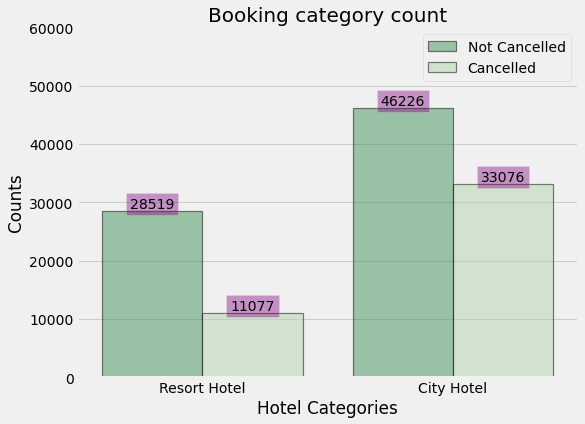

In [440]:
plt.figure(figsize = (8,6))

l = ['Not_cancelled', 'cancelled']
ax = sns.countplot(x = 'hotel', data = df, hue = 'is_canceled', palette = 'Greens_r',
              linewidth = 1.2, edgecolor = 'black', alpha = 0.5)


ax.set_ylim(0, 60000)

# Modify the legend labels
new_labels = ['Not Cancelled', 'Cancelled']  # Your desired labels
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, new_labels)

for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h, str(round(h,2)), fontsize = 14, ha = 'center', va = 'bottom',
               bbox = {'facecolor': 'purple', 'alpha': 0.4})

plt.title('Booking category count', fontsize = 20)
plt.xlabel('Hotel Categories')
plt.ylabel('Counts')

plt.show()

## let's check cancellation for both the hotels

In [129]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [130]:
df_resort = df[df['hotel'] == 'Resort Hotel']
df_city = df[df['hotel'] == 'City Hotel']


In [131]:
df_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [132]:
df_city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-04-02


In [134]:
# cancelattion for Resort

resort_cancel = df_resort['is_canceled'].value_counts(normalize = True)*100

df_resort_cancel = pd.DataFrame(resort_cancel).reset_index()
df_resort_cancel


,index,is_canceled
0,0,72.024952
1,1,27.975048


In [135]:
# cancellation for City Hotel

cityhotel_cancel = df_city['is_canceled'].value_counts(normalize = True)*100

df_cityhotel_cancel = pd.DataFrame(cityhotel_cancel).reset_index()
df_cityhotel_cancel

,index,is_canceled
0,0,58.29109
1,1,41.70891


**Observation:**

- cancellation rate of Resorts < cancellation rate of city_hotel


## checking the variation in price i.e adr

In [136]:
df_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [140]:
resort_adr_trend = df_resort[['reservation_status_date','adr']].groupby('reservation_status_date').mean().reset_index()
resort_adr_trend

,reservation_status_date,adr
0,2014-11-18,0.000000
1,2015-01-01,61.966667
2,2015-01-02,9.633750
3,2015-01-18,0.000000
4,2015-01-21,37.301209
...,...,...
908,2017-09-08,101.012500
909,2017-09-09,147.778333
910,2017-09-10,145.272500
911,2017-09-12,153.570000


In [141]:
cityhotel_adr_trend = df_city[['reservation_status_date','adr']].groupby('reservation_status_date').mean().reset_index()
cityhotel_adr_trend

,reservation_status_date,adr
0,2014-10-17,62.800000
1,2015-01-01,62.063158
2,2015-01-20,76.500000
3,2015-01-30,61.400000
4,2015-02-17,76.500000
...,...,...
859,2017-09-03,137.172600
860,2017-09-04,116.925385
861,2017-09-05,154.000000
862,2017-09-06,93.293333


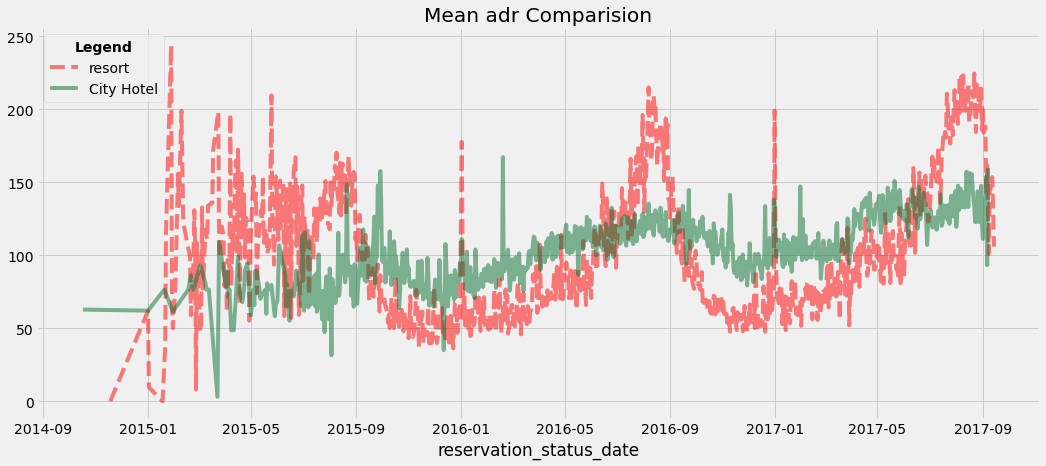

In [441]:
plt.figure(figsize = (16,8))


resort_adr_trend[['reservation_status_date','adr']].plot(x = 'reservation_status_date', y = 'adr', ax = plt.gca(),
                                                         color = 'red', alpha = 0.5, style = '--', label = 'resort')
cityhotel_adr_trend[['reservation_status_date','adr']].plot(x ='reservation_status_date', y = 'adr', ax = plt.gca(),
                                                           alpha = 0.5,label = 'City Hotel')
legend = plt.legend(title = 'Legend')
legend.get_title().set_fontweight('bold')

plt.xticks(rotation = 0, ha = 'center')

plt.title('Mean adr Comparision')
plt.show()

In [162]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
## let's check in the number of cancellations per month for hotels 

In [188]:
df['reservation_month'] = df['reservation_status_date'].dt.month


In [189]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


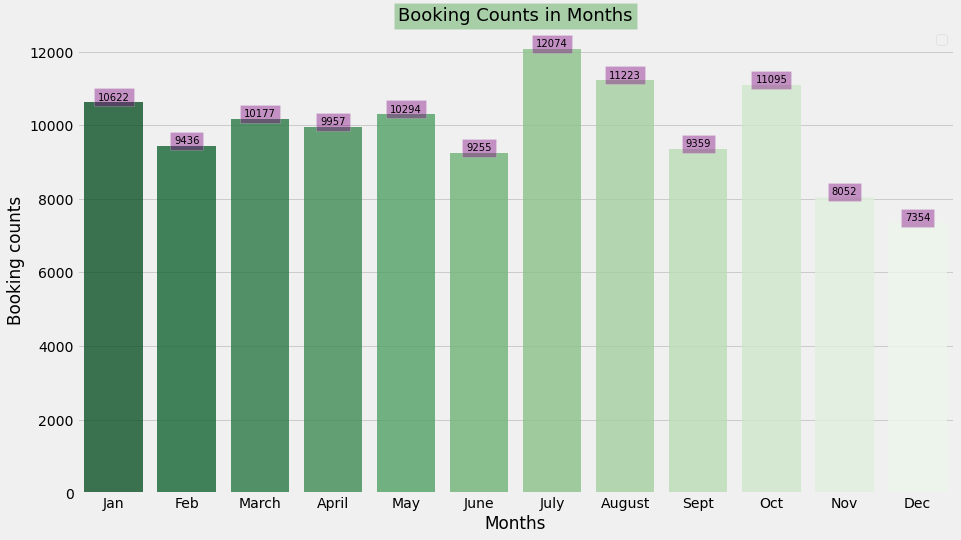

In [444]:
plt.figure(figsize = (14,8))

ax = sns.countplot(x = 'reservation_month', data = df, palette= 'Greens_r', alpha = 0.8)

for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h, str(round(h,2)), fontsize = 10, ha = 'center', va = 'bottom',
               bbox = {'facecolor': 'purple', 'alpha': 0.4})



        
# Change the legend labels
new_labels = ['Not Cancelled', 'Cancelled']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, new_labels)

ax.set_xticklabels(['Jan','Feb','March','April','May', 'June','July', 'August','Sept', 'Oct','Nov', 'Dec'])

plt.title('Booking Counts in Months', fontsize = 18, bbox = {'facecolor':'green','alpha': 0.3})
plt.ylabel('Booking counts')
plt.xlabel('Months')

plt.show()


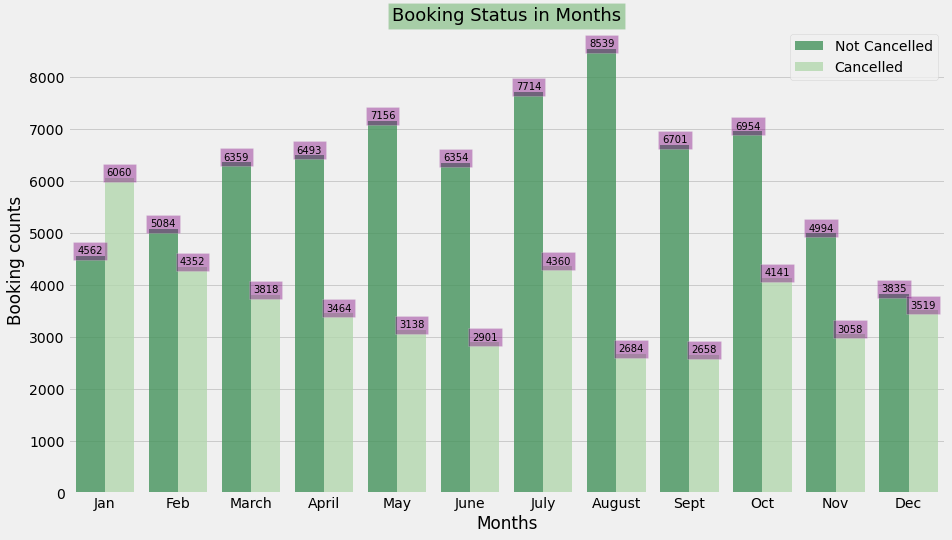

In [442]:
plt.figure(figsize = (14,8))

ax = sns.countplot(x = 'reservation_month', data = df, hue = 'is_canceled', palette= 'Greens_r', alpha = 0.8)

for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h, str(round(h,2)), fontsize = 10, ha = 'center', va = 'bottom',
               bbox = {'facecolor': 'purple', 'alpha': 0.4})



        
# Change the legend labels
new_labels = ['Not Cancelled', 'Cancelled']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, new_labels)

ax.set_xticklabels(['Jan','Feb','March','April','May', 'June','July', 'August','Sept', 'Oct','Nov', 'Dec'])

plt.title('Booking Status in Months', fontsize = 18, bbox = {'facecolor':'green','alpha': 0.3})
plt.ylabel('Booking counts')
plt.xlabel('Months')

plt.show()


In [213]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


### dataframe for total bookings month wise

In [273]:
cx = df[['reservation_month','is_canceled']].groupby('reservation_month').count().reset_index()

cx.rename(columns = {'is_canceled': 'bookings_count'}, inplace = True)
cx.head()

,reservation_month,bookings_count
0,1,10622
1,2,9436
2,3,10177
3,4,9957
4,5,10294


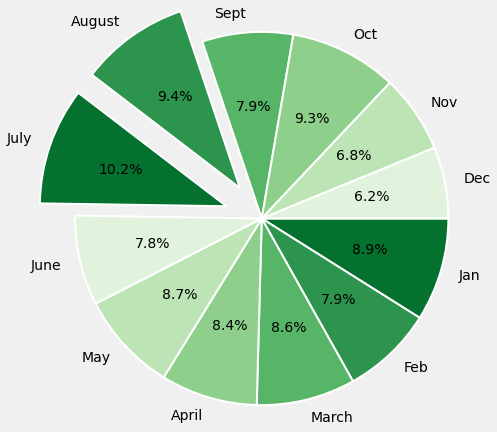

In [274]:
ex= [0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.0,0.0,0.0]
cx.head()
l = ['Jan','Feb','March','April','May', 'June','July', 'August','Sept', 'Oct','Nov', 'Dec']

plt.pie(x = cx['bookings_count'],labels = l, autopct = '%0.1F%%', radius = 2,
       textprops = {'color': 'black','fontsize': '14'}, explode = ex,rotatelabels = False,counterclock = False,
       wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.show()

- maximum bookings happed in the month of August and July

### dataframe for total cancelletions month wise

In [277]:
cy = df[df['is_canceled'] == 1][['reservation_month','is_canceled']].groupby('reservation_month').count().reset_index()
cy.rename(columns = {'is_canceled': 'cancellation_count'}, inplace = True)
cy.head()

,reservation_month,cancellation_count
0,1,6060
1,2,4352
2,3,3818
3,4,3464
4,5,3138


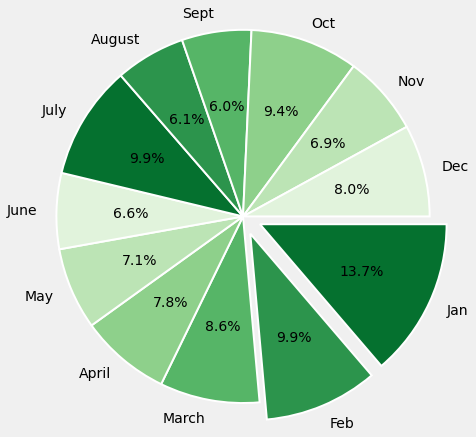

In [282]:
ex= [0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
cx.head()
l = ['Jan','Feb','March','April','May', 'June','July', 'August','Sept', 'Oct','Nov', 'Dec']

plt.pie(x = cy['cancellation_count'],labels = l, autopct = '%0.1F%%', radius = 2,
       textprops = {'color': 'black','fontsize': '14'}, explode = ex,rotatelabels = False,counterclock = False,
       wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.show()

- maximum cancellations have happened in the Month of Jan and Feb

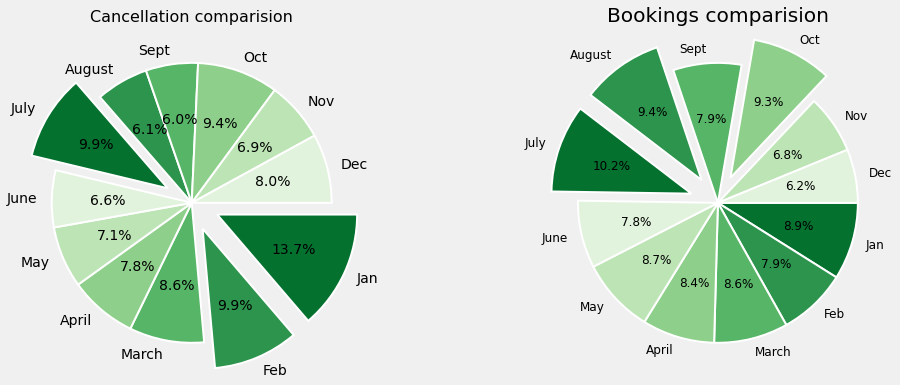

In [330]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'aspect': 'equal'})

ex = [0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0]
l = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec']

# Plot first pie chart

axes[0].pie(x = cy['cancellation_count'],labels = l, autopct = '%0.1F%%', radius = 1,
       textprops = {'color': 'black','fontsize': '14'}, explode = ex,rotatelabels = False,counterclock = False,
       wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})


axes[0].set_title('Cancellation comparision' ,fontsize = 16)



ex = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0]


# Plot second pie chart

axes[1].pie(x=cx['bookings_count'], labels=l, autopct='%0.1F%%', radius=1,
             textprops={'color': 'black', 'fontsize': '12'}, explode=ex, rotatelabels=False, counterclock=False,
             wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

axes[1].set_title('Bookings comparision')

plt.subplots_adjust(wspace=0.5)  # Adjust the space between subplots

plt.show()





- Cancellations have been highest in the month of Jan
- lowest in the month of sept

## Let's Compare Price trends in mOnths

In [331]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


### MEAN adr DataFrame

In [338]:


dp = df[df['is_canceled'] == 1][['adr', 'reservation_month']].groupby('reservation_month').mean().reset_index()
dp

,reservation_month,adr
0,1,94.258015
1,2,104.107482
2,3,111.281446
3,4,122.781533
4,5,124.741262
5,6,123.751582
6,7,110.407378
7,8,121.336971
8,9,103.151366
9,10,79.924866


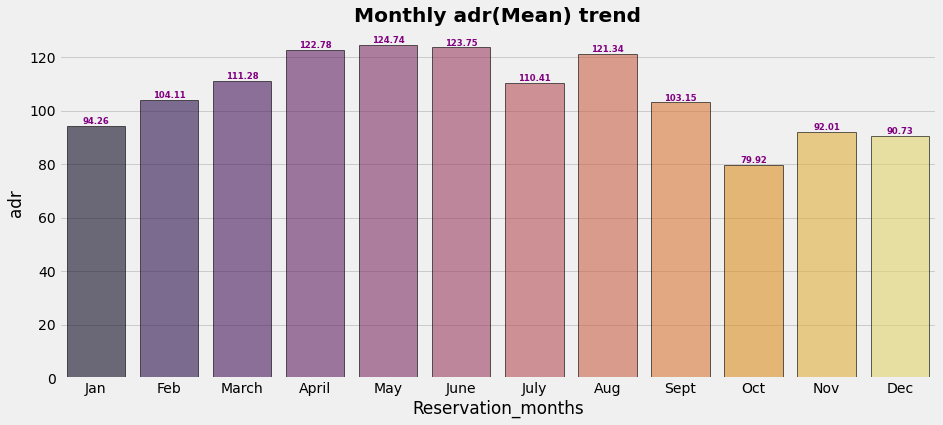

In [382]:
#plot of mean adr

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (14,6))

# Create the bar plot
ax = sns.barplot(x='reservation_month', y='adr', data=dp, palette='inferno', linewidth=1, edgecolor='black', alpha=0.6,)

# Add labels above each bar
for container in ax.containers:
    for bar in container:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, h, f'{h:.2f}', fontsize=8.5, ha='center', va='bottom', fontweight = 'bold',
               color = 'purple')

ax.set_xticklabels(['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'])

plt.xlabel('Reservation_months')
plt.ylabel('adr')
plt.title('Monthly adr(Mean) trend',fontweight = 'bold')
plt.show()


### SUM adr DataFrame

In [379]:
# sum adr  dataset
szz = df[df['is_canceled']== 1].groupby('reservation_month')[['adr']].sum().reset_index()
szz.head()

,reservation_month,adr
0,1,571203.57
1,2,453075.76
2,3,424872.56
3,4,425315.23
4,5,391438.08


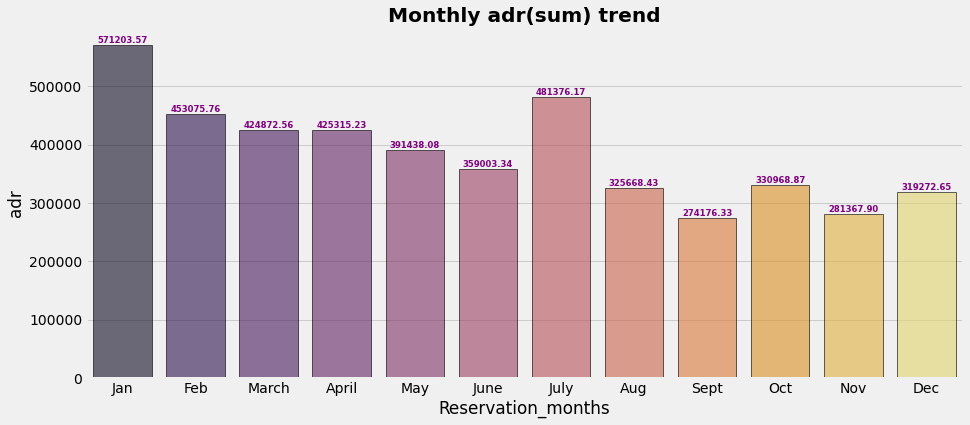

In [383]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (14,6))

# Create the bar plot
ax = sns.barplot(x='reservation_month', y='adr', data=szz, palette='inferno', linewidth=1, edgecolor='black', alpha=0.6,)

# Add labels above each bar
for container in ax.containers:
    for bar in container:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, h, f'{h:.2f}', fontsize=8.5, ha='center', va='bottom', fontweight = 'bold',
               color = 'purple')

ax.set_xticklabels(['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'])

plt.xlabel('Reservation_months')
plt.ylabel('adr')
plt.title('Monthly adr(sum) trend',fontweight = 'bold')
plt.show()

## **observation**

- Cancellations : highest in Jan
    - mean adr in jan is less but sum of adr in jan is more
       -  sugegst ; though cancellations have happened but overall revenue contribution, 
       -  jan tops, might be because of longer stays or occupancies
- While ADR can influence cancellation rates to some extent (e.g., guests might cancel if they find a cheaper rate elsewhere), 
- it's not the only factor at play.
- Other factors such as customer preferences, external events, and economic conditions can also influence 
  cancellation behavior.
  
  
**Seasonal Variation in Cancellation Rates:**

- Highest Cancellation Months:

   - January, July, and October stand out with relatively high cancellation rates 
     (13.7%, 9.9%, and 9.4% respectively). 
   - These months show spikes compared to others, indicating potential seasonal factors 
     influencing cancellation behavior.
     
- Lowest Cancellation Months: 

   - November and December have the lowest cancellation rates (6.9% and 8.0% respectively), 
     which could suggest more stable booking patterns possibly due to holidays or special events.
     
**Comparison with Booking Rates:**

- Misalignment in July: 

  - July has a high cancellation rate (9.9%) despite having a high booking rate (10.2%). 
  - This discrepancy warrants investigation into what factors might be causing customers to cancel bookings during     this typically busy period.
 
 
**Average Daily Rate (ADR) Impact:**

- Inverse Relationship: 

  - Generally, months with higher ADRs tend to have lower cancellation rates. 
  - For example, months like April and May, which have higher ADRs (122.78 and 124.74 respectively)           correspondingly have lower cancellation rates (7.8% and 7.1% respectively). 
  - This suggests that customers may be more committed to bookings when they have already made a higher financial   commitment.
 
**Economic and Seasonal Influences:**

- October Anomaly: 

  - October stands out with a high cancellation rate (9.4%) despite having a relatively low ADR. 
  - This could indicate specific economic factors or events influencing booking decisions in that month.
  


## Cancellation Counts Top 10 COuntries

In [384]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


# Top 10 countries with cancellation counts

In [400]:
con_df = df[df['is_canceled']==1][['country','is_canceled']].groupby('country').count().sort_values(by = ['is_canceled'],ascending = False)[:10].reset_index()
con_df

,country,is_canceled
0,PRT,27515
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
5,DEU,1218
6,IRL,832
7,BRA,830
8,USA,501
9,BEL,474


In [403]:
ca = list(con_df['is_canceled'])
l = list(con_df['country'])


### plot countrywise cancellation rates

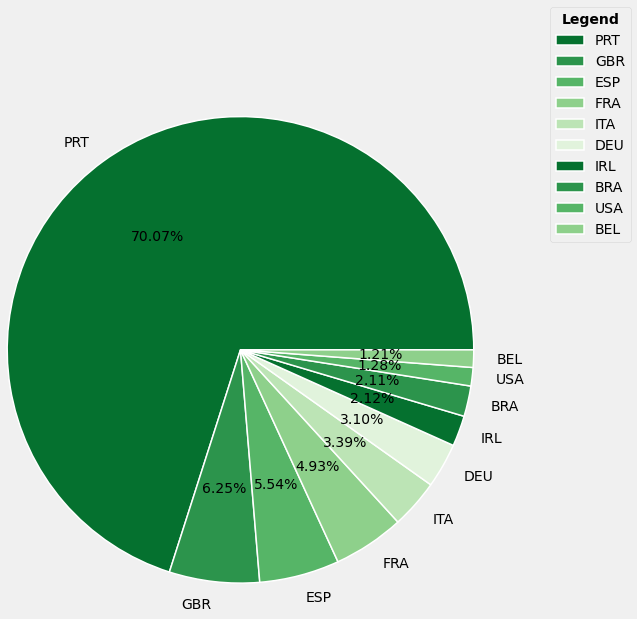

In [424]:
plt.figure(figsize = (10,4))
plt.pie(x = ca, labels = l, autopct = '%0.2f%%',radius = 2.5,
       wedgeprops = {'linewidth': 1.5, 'edgecolor': 'white'})

legend = plt.legend(title = 'Legend', loc = 'upper center', bbox_to_anchor = (2,1,0,1))
legend.get_title().set_fontweight('bold')

plt.show()

- Prt Counts for maximum % of cancellation

### Let's see the source of clients

In [426]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


### dataframe of clientsource

In [429]:
df_market =pd.DataFrame( df['market_segment'].value_counts()).reset_index()
df_market

,index,market_segment
0,Online TA,56402
1,Offline TA/TO,24160
2,Groups,19806
3,Direct,12448
4,Corporate,5111
5,Complementary,734
6,Aviation,237


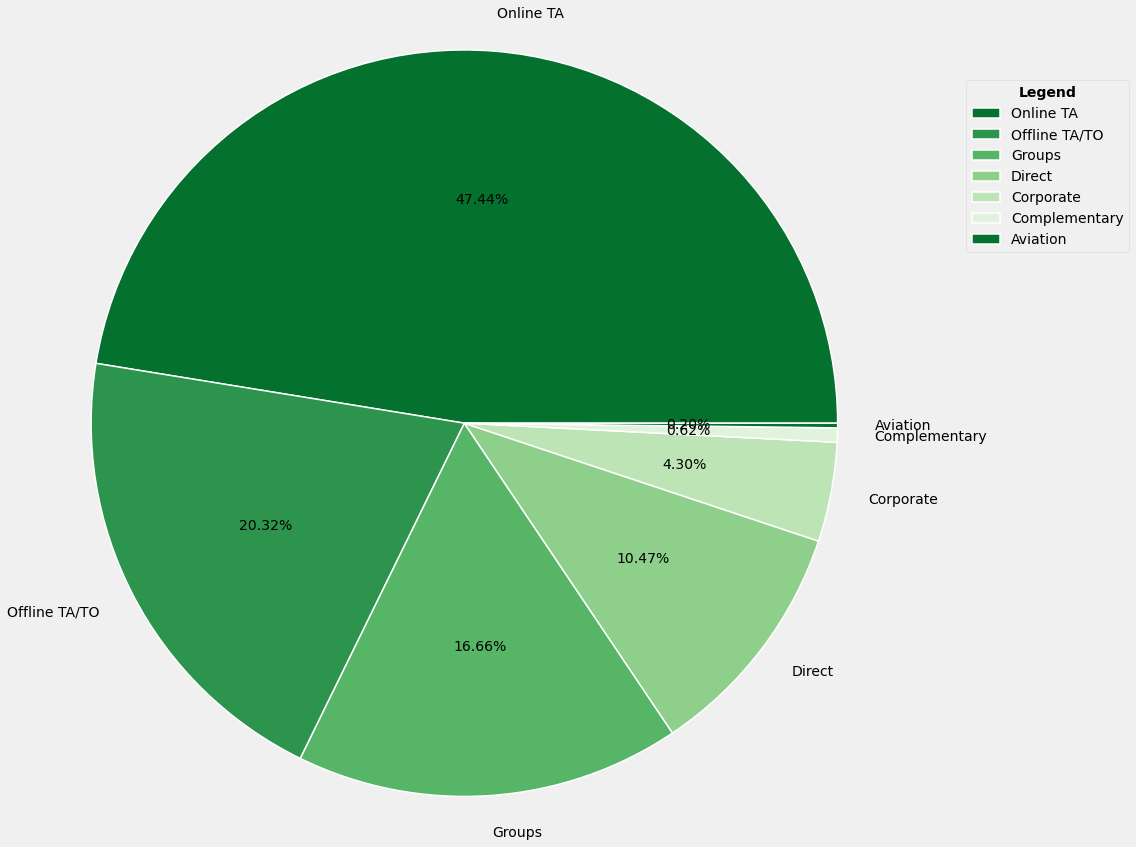

In [433]:
m = list(df_market['market_segment'])
s = list(df_market['index'])


plt.figure(figsize = (10,4))
plt.pie(x = m, labels = s, autopct = '%0.2f%%',radius = 4,
       wedgeprops = {'linewidth': 1.5, 'edgecolor': 'white'})

legend = plt.legend(title = 'Legend', loc = 'upper center', bbox_to_anchor = (3,1,0,1))
legend.get_title().set_fontweight('bold')

plt.show()

- Majority of bookings are happening through Onlin TA

In [435]:
df_cancelled_market = df[df['is_canceled']==1]
df_cancelled_market.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_month
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06,5
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22,4
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23,6
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11,5
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29,5


In [436]:
# cancelled client_source

df_cancelled_market['market_segment'].value_counts(normalize = True)*100

Online TA        46.968496
Groups           27.397912
Offline TA/TO    18.748443
Direct            4.348515
Corporate         2.215025
Complementary     0.203837
Aviation          0.117772
Name: market_segment, dtype: float64

- majority of cancellations are happening for the tickets booked  through online TA

**possible causes**
- booked online by checking reviews and pics
  - but later while checking in saw the relaity which wasnt as was suggested. 
  - online : plenty of options, after booking got fairer deal somewhere else. 
